In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

C:\Users\Kevin Yang\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


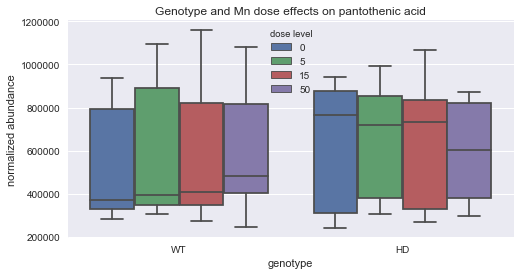

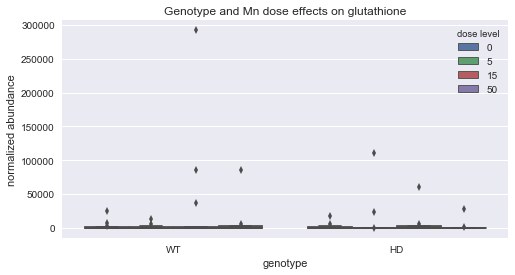

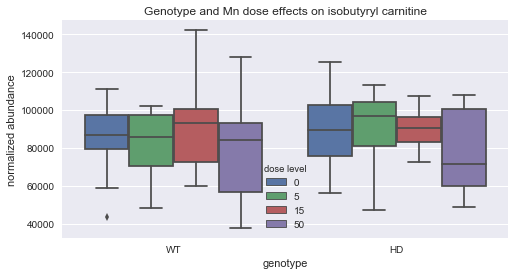

In [3]:
metabolites = pd.read_csv('../Documents/metabo/kumar/kumar_metabolites.csv')

for compound in metabolites.columns[2:5]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x = 'genotype', y = compound, hue = 'dose level', data = metabolites)
    plt.ylabel('normalized abundance')
    plt.title('Genotype and Mn dose effects on ' + compound)
    plt.show()

In [5]:
#genotype 0 = wild type, genotype 1 = HD
#this is revised csv file for statistical analysis
metabolites = pd.read_csv('../Documents/metabo/kumar/kumar_metabolites_lm.csv')
metabolites['geno-dose'] = metabolites.genotype * metabolites.dose_level #interaction effect
pan = metabolites['pantothenic acid'].as_matrix()
glu = metabolites['glutathione'].as_matrix()
iso = metabolites['isobutyryl carnitine'].as_matrix()

ids = metabolites.drop(['pantothenic acid', 'glutathione', 'isobutyryl carnitine'], axis=1)
ids = ids.as_matrix()

In [6]:
#need to figure out how to encode dose levels as strings
for y in [pan, glu, iso]:
    x = sm.add_constant(ids)
    est = sm.OLS(y, x)
    est2 = est.fit()
    print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.3261
Date:                Thu, 06 Dec 2018   Prob (F-statistic):              0.806
Time:                        18:06:42   Log-Likelihood:                -1255.2
No. Observations:                  90   AIC:                             2518.
Df Residuals:                      86   BIC:                             2528.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         5.5e+05   6.89e+04      7.978      0.0